# workflow of pytorch

## Pytorch worlflow
let's explore an example pytorch end to end workflow 

resoureces :
* ground truth notebook -
* book version of notebook
* ask question     websiset

In [1]:
what_were_covering ={1:"data (prepare and load)",
                     2:"buildmodel",
                     3: "fitting the model to data(training)",
                     4:"making prediction and evaluating a model (interface)",
                      5:"saving and loading model",
                      6:"put it all together  "}
what_were_covering

{1: 'data (prepare and load)',
 2: 'buildmodel',
 3: 'fitting the model to data(training)',
 4: 'making prediction and evaluating a model (interface)',
 5: 'saving and loading model',
 6: 'put it all together  '}

In [2]:
import torch
from torch import nn # nn contain all of pytorch building blocks 
import matplotlib.pyplot as plt

# chaeck pytorch version
torch.__version__

'2.1.1+cu121'

## Data (prepraing aand loading )

data can be almos anything ... in machine learning
* excel
* image of any kind
* videos (youtube  has lots ..)
* Audio like songs or podcast
* DNA
* Text

Machine learning is a game of two parts
1. aGet data into a numerical representation 
2. build a amodelto learn patters in that numerical data

To showcase this , lets create some *known* data using the linear regression formula.

we'll use a linear regression formua to make  strainght line with know parameters.

In [3]:
## create known parameter 
weight =0.7
bias = 0.3
# y =a+ bi
# create
start =0
end = 1

step =0.02
X = torch.arange(start,end,step).unsqueeze(dim =1)
y = weight *X + bias

X[:10],y[:10] ,len(X) ,len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
len(X) ,len(y)

(50, 50)

### spliting data into test sets 


In [5]:
# create a train./test split
train_split =int(0.8 *len(X))
x_train,y_train = X[:train_split],y[:train_split]
x_test ,y_test =X[train_split:],y[train_split:]

In [6]:
x_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

In [7]:
len(x_train) ,len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [8]:
x_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### visulaization of the data 

In [9]:
def plot_prediction(train_data = x_train,
                   train_label =y_train,
                   test_data = x_test,
                   test_label = y_test,
                   predictions = None):
    '''
    plot the data ,test data  and compress prediction '''

    plt.figure(figsize =(10,7))
    
    # plot training data in blue 
    plt.scatter(train_data,train_label,c='b',s=4,label = 'training data')

    # plot test data in green 
    plt.scatter(test_data,test_label,c='g',s=4,label = 'testing data')

    # are there prediction ?
    if predictions is not None:
        #plot the preediction  if they exist
        plt.scatter(test_data,predictions,c='r',s=4,label = 'predictions')
    plt.legend(prop={"size":14});
        
    


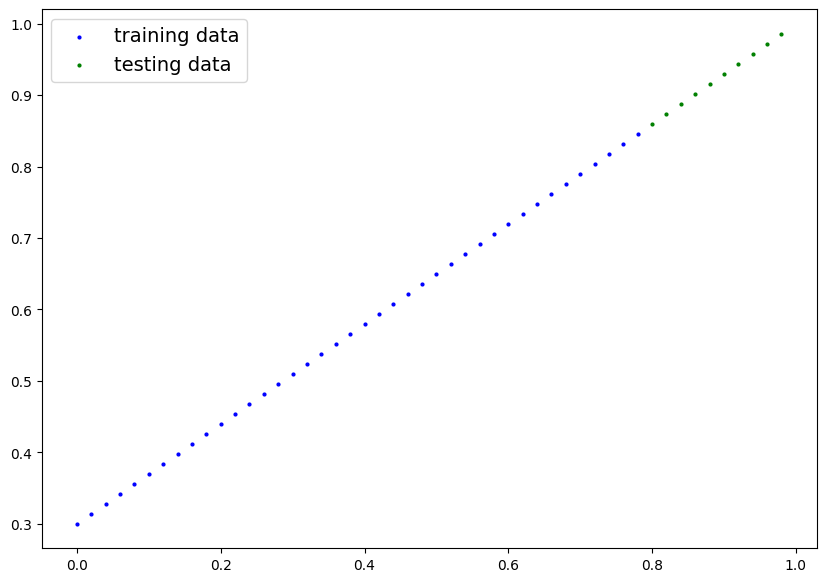

In [10]:
plot_prediction();

### 2. Building model

our first pytorch model

because we are going to be biulding classes throughtout the course ,
I'd recommend from real python 
what our model does:
* starts with random values (weights &  bias)
* look at training data and adjust the random values to better
represent (or get closer to) the ideal values (the weights & bias values)

How does it do so ?
1. Gradient descent
2. backpropogation

In [11]:
# create linear regression model class
class LinearRegressionModel(nn.Module): # almost eveythinfg pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                                                requires_grad =True, ## 
                                                dtype = torch.float))
        self.bias =nn.Parameter(torch.rand(1,requires_grad =True,
                                          dtype= torch.float))
        # forward method to define the computation in the model 
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias # this is the linear regression formula 
        
    

### pytorch model building essentials 
* torch.nn -contains all of the buildings for computational graphs (a nueral network can be considered a computatuional graph)
* torch.nn.parameter - what parameter should our model try and learn often a pytorch layer from torch.nn will set these for us 
* torch.nn.Modules -the base class for all neural network modules , if you subclass it, you should overwrite forward ()
* torh.optmum  -this where the optimizer in pytorch live they will help with gradient decent
* def forward() all nn.module subclasse require you to overwrite forward() , this method defines what happens in the forward computation
* 

### checking the content of our pytorch 

now we've  created  a model , let's seee what's inside....

so we can chcek our model parameter or  what's inside our model  torch.parameter()

In [12]:
# create a random seed
random_seed = 42
torch.manual_seed(random_seed)

# created an isntance of the model (this is a subclass of nn.Module )
model_0= LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [14]:
x_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### making prediction using torch.inference_mode)

to check our model's predictive paper let's see how well it predicts y_test based on x_test

whsen we pass through our model  it' going to run it trough the forward() method


In [15]:
## make prediction  with model
with torch.inference_mode():
    y_pred = model_0(x_test)
with torch.no_grad():
    y_pred =model_0(x_test)
y_pred

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

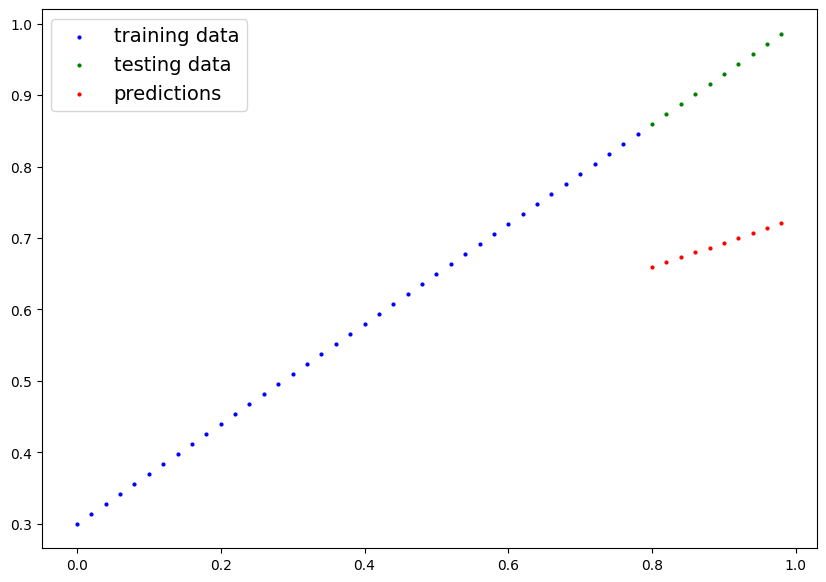

In [16]:
plot_prediction(predictions = y_pred)

### train model 
the whole idea of the training is for a model to move from some unkonwn parameter (these may be random ) to some known parameters \

or in other from a poor representation of the dat a better representation of the data

one way to measure how wrong your models predictions are is to use a loss function 

* Note : Loss function may also be called cost function in differernt ares .For our csse we are going to refer to it A  loss function

* **Loss FUnction**  A function to measure how wrong your model predection are to he ideal outputs . lower is better
* **optimizer** Take into account the loss of a model and adjusts the models's parameters (e.g. weights & bias) in this case to improve the loss function
  parameters of optipmizer
  * params = the model paramters you'll liked to opmize for example params = model_o.parameters()
  * lr(learning rate ) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters
A nd specify for pytorch we need:
* a training loop
* a testing loop

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [18]:
# setup a loss function  many function are avilabel
loss_fn = nn.L1Loss()

#setup an optmizer 
optimizer = torch.optim.SGD(params = model_0.parameters(),
                          lr = 0.01 ) # learning rate = possibly the most important hyperparameter  we can set  

In [19]:
loss_fn

L1Loss()

### building a traning and testing loop in pytorch 

A couple of things we need in a traning loop:

0. Loop through the data
1. forward pass(this involves dat moving through our moedel's forwars() function -also called forward propogation
2. calculate the loss compare forward pass predictions to ground truth labels
3. optmizer zero grad
4. loss backward - move backward throug the network to calculate the gradient of each of the parameter of our odles with respect to the loss (**backpropogation**)
5. optimizer step - use the optmixer to adjust our model's parameters to try and improve the loss (**gradient decnet**)
6. 

In [20]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [21]:
list(model_0.eval().parameters())
with torch.no_grad():
 list(model_0.parameters())

In [22]:
# An epoch is one loop through the data ....(this is a hyperparameter beacuse we'have set it by ourselves)
epochs = 200

epoch_value =[]
loss_values =[]
test_loss_values=[]
### training loop
# 0. loop through the data 
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() #train model in pytorch set  all parameters that requires gradient

    #1 forward pass 
    y_pred = model_0(x_train)
    
    #2. calculate the loss
    loss = loss_fn(y_pred,y_train)
    print('loss : ',loss)
    print()
    
    #3. optmixer zero grad 
    optimizer.zero_grad() # by default how the optmizer will accumulate the loops so ..... we have to zero then above in step 3 for the next iteration of the the loop 
    
    
    #4. perform bavkpropogation on the loss with respect to the parameter of the model 
    loss.backward()
    
    #5. setp the optmizer (perform gradient decent )
    optimizer.step()
    
    
    ## testing 
    model_0.eval() # turn off different setting in the model not neede for evaluation /testing (dropout layers )
    with torch.inference_mode(): # turn off gradient tracking &a  couple more things behind the 
    # with torch.no_grad(): # we have may also see torch.no_grad() in order pytorch code
        #1 do the forward pass
        test_pred = model_0(x_test)\
    
        # calculate the loss
        test_loss =loss_fn(test_pred,y_test)
    if epoch %10 == 0:
       epoch_value.append(epoch)
       loss_values.append(loss)
       test_loss_values.append(test_loss)
       print(f"epoch :{epoch} | test : {loss} | test loss : {test_loss}")
    
       print(model_0.state_dict())

loss :  tensor(0.0817, grad_fn=<MeanBackward0>)

epoch :0 | test : 0.08169572055339813 | test loss : 0.22662055492401123
OrderedDict([('weight', tensor([0.3398])), ('bias', tensor([0.3939]))])
loss :  tensor(0.0795, grad_fn=<MeanBackward0>)

loss :  tensor(0.0777, grad_fn=<MeanBackward0>)

loss :  tensor(0.0760, grad_fn=<MeanBackward0>)

loss :  tensor(0.0745, grad_fn=<MeanBackward0>)

loss :  tensor(0.0731, grad_fn=<MeanBackward0>)

loss :  tensor(0.0720, grad_fn=<MeanBackward0>)

loss :  tensor(0.0708, grad_fn=<MeanBackward0>)

loss :  tensor(0.0698, grad_fn=<MeanBackward0>)

loss :  tensor(0.0690, grad_fn=<MeanBackward0>)

loss :  tensor(0.0681, grad_fn=<MeanBackward0>)

epoch :10 | test : 0.06808149069547653 | test loss : 0.1807345449924469
OrderedDict([('weight', tensor([0.3672])), ('bias', tensor([0.4154]))])
loss :  tensor(0.0673, grad_fn=<MeanBackward0>)

loss :  tensor(0.0667, grad_fn=<MeanBackward0>)

loss :  tensor(0.0660, grad_fn=<MeanBackward0>)

loss :  tensor(0.0654, gra

In [23]:
with torch.inference_mode():
    y_pred_new = model_0(x_test)

In [24]:
# plot_prediction(predictions =y_pred)

In [25]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [26]:
weight ,bias

(0.7, 0.3)

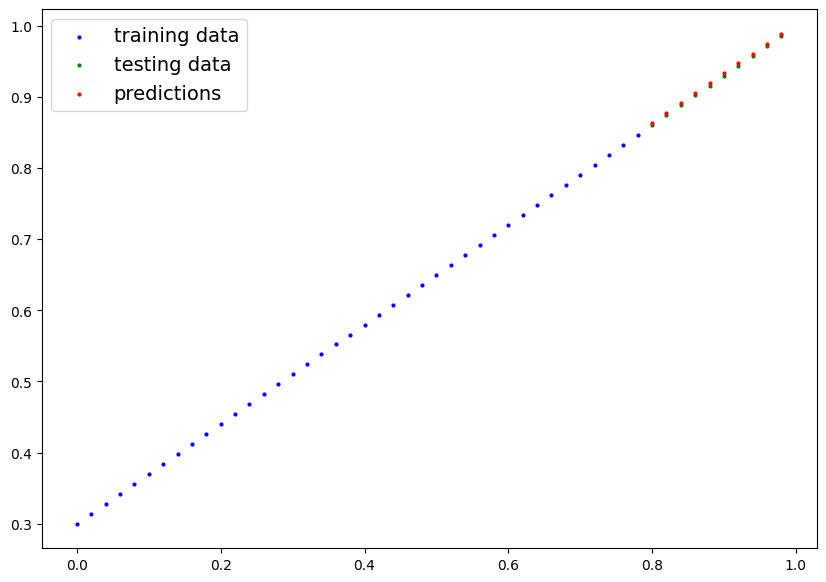

In [27]:
plot_prediction(predictions =y_pred_new)


In [28]:
epoch_value ,loss_values ,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.0817, grad_fn=<MeanBackward0>),
  tensor(0.0681, grad_fn=<MeanBackward0>),
  tensor(0.0626, grad_fn=<MeanBackward0>),
  tensor(0.0588, grad_fn=<MeanBackward0>),
  tensor(0.0553, grad_fn=<MeanBackward0>),
  tensor(0.0518, grad_fn=<MeanBackward0>),
  tensor(0.0484, grad_fn=<MeanBackward0>),
  tensor(0.0449, grad_fn=<MeanBackward0>),
  tensor(0.0415, grad_fn=<MeanBackward0>),
  tensor(0.0381, grad_fn=<MeanBackward0>),
  tensor(0.0346, grad_fn=<MeanBackward0>),
  tensor(0.0312, grad_fn=<MeanBackward0>),
  tensor(0.0278, grad_fn=<MeanBackward0>),
  tensor(0.0243, grad_fn=<MeanBackward0>),
  tensor(0.0209, grad_fn=<MeanBackward0>),
  tensor(0.0175, grad_fn=<MeanBackward0>),
  tensor(0.0140, grad_fn=<MeanBackward0>),
  tensor(0.0106, grad_fn=<MeanBackward0>),
  tensor(0.0072, grad_fn=<MeanBackward0>),
  tensor(0.0037, grad_fn=<MeanBackward0>)],
 [tensor(

In [29]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()) ,test_loss_values


(array([0.08169572, 0.06808149, 0.06258393, 0.05879194, 0.05530194,
        0.05182225, 0.04838594, 0.04494876, 0.04152032, 0.03808232,
        0.03464684, 0.03121751, 0.02777871, 0.0243449 , 0.0209139 ,
        0.01747509, 0.01404297, 0.01061027, 0.00717147, 0.00374104],
       dtype=float32),
 [tensor(0.2266),
  tensor(0.1807),
  tensor(0.1563),
  tensor(0.1419),
  tensor(0.1308),
  tensor(0.1205),
  tensor(0.1122),
  tensor(0.1046),
  tensor(0.0964),
  tensor(0.0881),
  tensor(0.0805),
  tensor(0.0722),
  tensor(0.0640),
  tensor(0.0564),
  tensor(0.0481),
  tensor(0.0398),
  tensor(0.0323),
  tensor(0.0240),
  tensor(0.0157),
  tensor(0.0081)])

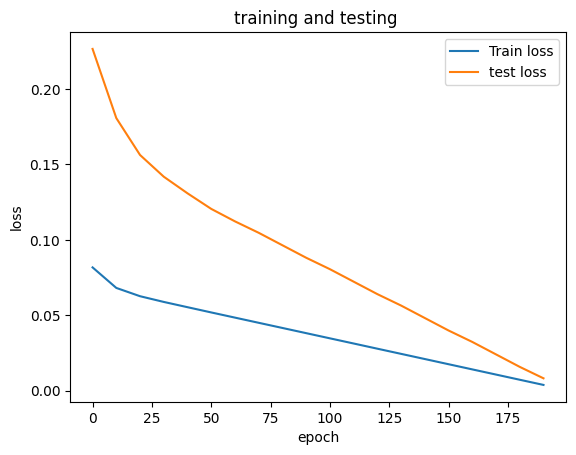

In [30]:
# plot loss curve
plt.plot(epoch_value,np.array(torch.tensor(loss_values).numpy())  ,label ='Train loss')
plt.plot(epoch_value,test_loss_values , label ='test loss')
plt.title('training and testing ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()


# saving a model in pytorch

There are three main methods ywe shou;d about for saving and loading the model
1. teorch.save() it will saev in the pickel format
2. torch.laod() allowas you save pytorch object
3. torch.nn,MOdule.load_state_dict() - this allowas to laos a model saved state dictionary 

In [31]:
# saveing our pytorch model
from pathlib import Path

# 1. create a director 
model_path = Path('models')
model_path.mkdir(parents =True ,exist_ok =True)

# 2. create model save path 
model_name = '01pytorch_workflow_model_0.pth'
model_save_path = model_path /model_name

# save the model 
print(f'svaing the model {model_save_path}')
torch.save(obj = model_0.state_dict(),f =model_save_path)

svaing the model models/01pytorch_workflow_model_0.pth


In [32]:
!ls -1 models

01pytorch_workflow_model_0.pth
01_pytorch_workflow_model_1.pth


## loading a pytorch model
since we saved our model's state_dict() rather the entire model we'll create a new instance of our model classs and load the saved state_dict() into thath 

In [33]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [34]:
# to load in a saved state_dict we have to instance a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict pf model_0 (this will update the new instance with update parameters)
loaded_model_0.load_state_dict(torch.load(f= model_save_path))

<All keys matched successfully>

In [35]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [36]:
# make some prediction 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [37]:
# compare loaded model
y_pred == loaded_model_0

False

In [38]:
# make some models preds
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(x_test)
y_pred

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [39]:
y_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together 
let's go back through the step above and see it all in one oreder

In [40]:
# import pytorch  and matplotlib
import torch 
from torch import nn
import matplotlib.pyplot as plt

# chec pytorch version 
torch.__version__

'2.1.1+cu121'

Create device _agnostic code

this mean if we have got access to a gpu , our code will use it (for potenially faster computing )
if no GPU is avilable the code will default to using cpu


In [41]:
# setup devive agnostic code
device ='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [42]:
! nvidia-smi

Tue May 14 20:56:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8               5W /  35W |     10MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## data 

In [43]:
## create some data using the linear regression formula fo y = weight *x + bias 
weight =0.7
bias = 0.3

# create range values
start =0
end = 1
steps = 0.002

# create x and y (features and label )
X =torch.arange(start ,end ,step).unsqueeze(dim = 1) # without unsqueeze error will pop up
y = weight *X + bias 

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
## split the data 
train_split =int(0.8 *len(X))
X_train , y_train  = X[:train_split],y[:train_split]
X_test ,y_test = X[train_split:] ,y[train_split:]
len(X_train) ,len(y_train) ,len(X_test) ,len(y_test)

(40, 40, 10, 10)

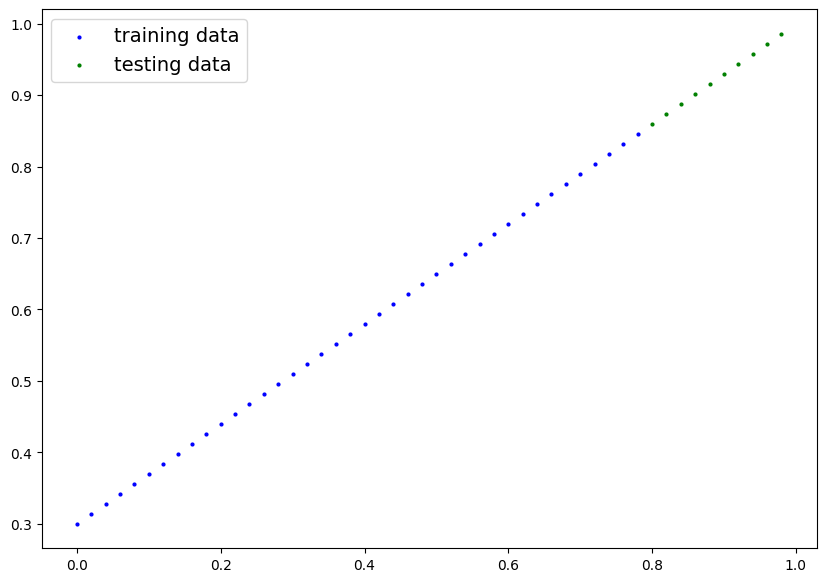

In [45]:
# plot the data
# note : if you don't have the plot function load it 
plot_prediction(X_train,y_train,X_test,y_test)

## building a pytorch linear model 

In [46]:
## create  a linear model by subclassing nn.Module 
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.linear() for creating the model parameters 
        self.linear_layer = nn.Linear(in_features =1,
                                     out_features =1)
    def forward(self,x) -> torch.Tensor:
        return self.linear_layer(x)
# set mannual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [47]:
# check the current model device
next(model_1.parameters()).device

device(type='cpu')

In [48]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [49]:
device

'cuda'

### training 

* loss function
* optimizer
* training loop
* testing loop


In [50]:
# setup the loss function 
loss_fn = nn.L1Loss()

# set optimizer 
optimizer = torch.optim.SGD( params = model_1.parameters(),
                      lr = 0.01 ,
                           )

In [51]:
# let's write a training loop
torch.manual_seed(42)

epochs =200 

for epoch in range(epochs):
    model_1.train()

   # forward pass
    y_pred = model_1(X_train)

  # calculate the loss
    loss = loss_fn(y_pred ,y_train)

  # optmizer zero grad
    optimizer.zero_grad()

  # perform backpropogation 
    loss.backward()

  # oprimizer step
    optimizer.step()

   ### testing 
    model_1.eval()
    with torch.inference_mode():
        test_pred =model_1(X_test)

        test_loss =loss_fn(test_pred ,y_test)

 # print out 
    if epoch %10 == 0:
        print(f'epoch {epoch} | loss : {loss} | test loss {test_loss}')
        
    

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
model_1.state_dict()

## making and evaluating prediction 


In [ ]:
model_1.eval()

# make prediction on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

In [ ]:
# checkinf the prediction visualization 
plot_prediction(predictions  =  y_preds)

## saving and loading 

In [ ]:
from pathlib import Path

# create model directory 
model_path = Path('models')
model_path.mkdir(parents =True ,exist_ok =True)

# create model svae path
model_name = '01_pytorch_workflow_model_1.pth'
model_save_path = model_path/model_name

model_save_path

In [ ]:
#3 save the model 
print(f'saving the model at {model_save_path}')
torch.save(obj= model_1.state_dict(),f= model_save_path) 


In [ ]:
!ls -1 models

In [ ]:
## loaded a pytorch model

# create a nre instance of linear model v2
loaded_model_1 = LinearRegressionModelV2() 

# load the save model_1 state_dict

loaded_model_1.load_state_dict(torch.load(model_save_path))

# put the model to device

loaded_model_1.to(device)

In [ ]:
## evaluate the loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

## exercise and extera curriculam 

* exercise https://www.learnpytorch.io/01_pytorch_workflow/#exercises
* EXTRA CARRIULA  : https://www.learnpytorch.io/01_pytorch_workflow/#exercises

# exercise 